In [51]:
import numpy as np
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt
import math

In [52]:
def itt_nu(vlass_flux, nvss_flux):
    freq_nvss = 1.4
    freq_vlass = [0, 2.4]
    nu = [-0.7]
    i = 1
    #while (freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i] > 0.05:
    while i < 100:
        #print((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i])
        const_v = np.log(freq_vlass[i]/freq_nvss)

        spectral_index = (np.log(vlass_flux/nvss_flux)/(const_v)) 
        freq_vlass_guess = 2 + 2*(spectral_index+1)/(spectral_index+2)
        
        freq_vlass.append(freq_vlass_guess)
        nu.append(spectral_index)
        i+=1
        if i > 100:
            print('Error, did not converge')
            return(freq_vlass, nu)
    return(freq_vlass, nu)
        

In [25]:
itt_nu(0.001, 0.00165)

([0,
  2.4,
  2.1324325706671026,
  1.5306191201646353,
  4.553392974392988,
  2.730479872290049,
  2.4004378417779026,
  2.1329805769239654,
  1.5328314806979144,
  4.567438371064185,
  2.7313704299631567,
  2.4009056510228954,
  2.1335652159909535,
  1.535183775059945,
  4.582630595631807,
  2.7323240550478545,
  2.4014056121402403,
  2.1341890398577923,
  1.5376847183709605,
  4.5990829333794725,
  2.73334565169592,
  2.4019400909776585,
  2.134854797034307,
  1.5403435694364418,
  4.616923102574601,
  2.734440576389124,
  2.402511653785006,
  2.1355654512701814,
  1.5431701691460673,
  4.636295652494855,
  2.735614691645512,
  2.4031230888538686,
  2.136324202757165,
  1.5461749831819178,
  4.657364865353344,
  2.7368744281879023,
  2.4037774313421605,
  2.1371345122742884,
  1.5493691499076783,
  4.680318291527284,
  2.738226857289694,
  2.4044779919083044,
  2.1380001288462585,
  1.5527645345436387,
  4.705371087166737,
  2.739679775440743,
  2.405228389932917,
  2.13892512162596

In [53]:
act_fluxes_dict = pk.load(open('ACT_central_flux_mjy.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux_mjy.pickle', 'rb'))
act_fluxes_dict_19 = pk.load(open('ACT_central_flux_Nov19.pickle', 'rb'))


In [45]:
for key in act_fluxes_dict.keys():
    print(act_fluxes_dict[key][1], act_fluxes_dict_19[key][1])

Median Background Median Background
1.66229583005131e-11 -1.8483203864682892e-05
8.965997545228584e-12 4.253892467546749e-05
3.857966833868334e-11 -3.6451880370085724e-05
5.533567148915513e-11 -4.252233029864745e-05
-3.1583385225422154e-11 -1.0916901891384836e-05
-8.630964450310326e-12 4.121794521203076e-05
-1.7260166303626162e-11 -3.8675727498432594e-05
-1.5386094696281467e-11 1.4748989128979049e-05
-2.0057542443202635e-11 2.347353347983094e-05
-1.2667897188314391e-11 2.995311839079601e-06
1.7426282452407515e-11 -4.5079026280628825e-07
3.9281526344213435e-11 7.832070547151054e-05
6.219780395950325e-11 -3.3485624677886704e-05
2.8775808037147596e-11 6.202334151121083e-05
5.722698919201982e-11 4.416169162120493e-05
-3.3390179720220143e-11 3.9821233792055204e-05
-1.5575326422696243e-11 2.8351486579439508e-05
-1.0038646421309724e-11 1.5380324443321982e-05
-2.2261314227418932e-11 4.195005541296781e-05
1.315127860392915e-10 1.0393679331018025e-06
2.934355605735552e-11 -2.6084350563853543e-05

1.580751590385441e-11 -4.242813337698268e-05
-1.9192593074152863e-11 -4.7119885532990643e-07
-1.6910487953914573e-11 -9.36985398404051e-06
1.6348246501314703e-11 5.322415131472228e-05
6.64978764587146e-11 0.00010750479504813687
1.9005383421155272e-11 -3.994941725214288e-06
1.8568890657564933e-11 -7.075859610014847e-06
5.24393022825007e-11 3.058183070499586e-05
3.5654805676176073e-11 5.67404702084527e-05
-7.901952187023293e-12 -1.9202951987357096e-05
-1.9788778811137224e-11 1.4836275240078122e-05
4.085783908834443e-11 7.912088202429022e-05
3.6912090675055354e-11 1.4985602505468645e-06
-3.360719718663242e-11 3.364517932651786e-05
-1.2811843829306777e-11 7.550215212669433e-06
-3.2420048443579615e-11 4.302261186389838e-05
1.5084154025210245e-10 7.346843347046351e-05
1.9948764334651217e-11 3.299893835216337e-05
5.5207592951306406e-11 -5.847080797217756e-05
5.490462519709911e-12 8.2548423919875e-06
6.429811016513271e-11 3.0368157533215227e-05
3.595616741014312e-11 -9.214727943245347e-06
-1.2

In [47]:
nvss_act_fluxes = np.zeros(len(act_fluxes_dict.keys())-1)
back_sub_nvss_act_fluxes =np.zeros(len(act_fluxes_dict.keys())-1)
for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_act_fluxes[i-1] = act_fluxes_dict[key][0]*10e6
    back_sub_nvss_act_fluxes[i-1] = (act_fluxes_dict[key][0] - act_fluxes_dict[key][1])*10e6
    
nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
back_sub_nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key][0]*10e6
    back_sub_nvss_mdcw_fluxes[i-1] = (mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1])*10e6
    
nvss_act_fluxes_19 = np.zeros(len(act_fluxes_dict_19.keys())-1)
back_sub_nvss_act_fluxes_19 =np.zeros(len(act_fluxes_dict_19.keys())-1)
for i, key in enumerate(act_fluxes_dict_19.keys()):
    if i == 0: continue
    nvss_act_fluxes_19[i-1] = act_fluxes_dict_19[key][0]
    back_sub_nvss_act_fluxes_19[i-1] = (act_fluxes_dict_19[key][0] - act_fluxes_dict_19[key][1])

cut = -99
nvss_act_fluxes = nvss_act_fluxes[nvss_act_fluxes > cut]
nvss_mdcw_fluxes = nvss_mdcw_fluxes[nvss_mdcw_fluxes > cut]
nvss_act_fluxes.sort()
nvss_mdcw_fluxes.sort()

back_sub_nvss_act_fluxes = back_sub_nvss_act_fluxes[back_sub_nvss_act_fluxes > cut]
back_sub_nvss_mdcw_fluxes = back_sub_nvss_mdcw_fluxes[back_sub_nvss_mdcw_fluxes > cut]
back_sub_nvss_act_fluxes.sort()
back_sub_nvss_mdcw_fluxes.sort()

min_act = min(back_sub_nvss_act_fluxes)
min_mdcw = min(back_sub_nvss_mdcw_fluxes)

#back_sub_nvss_act_fluxes = [1e3*value for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [1e3*value for value in back_sub_nvss_mdcw_fluxes]

#back_sub_nvss_act_fluxes = [value+min_act for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [value+min_mdcw for value in back_sub_nvss_mdcw_fluxes]
print(np.mean(nvss_mdcw_fluxes))
print(np.mean(nvss_act_fluxes_19))

0.004046605875415153
0.0006333574277120721


0.0031017261668379995


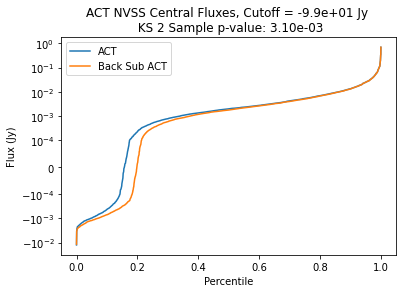

0.00633357427712072 0.006135153525465731
0.00020258420219149769
0.004046605875415153 0.003852164372059653


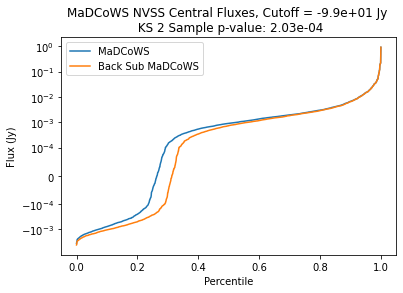

0.9999999999999979


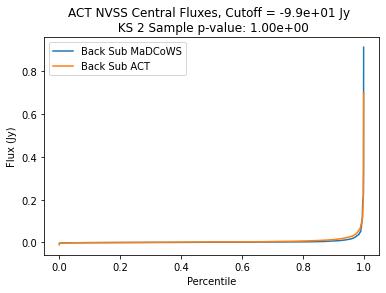

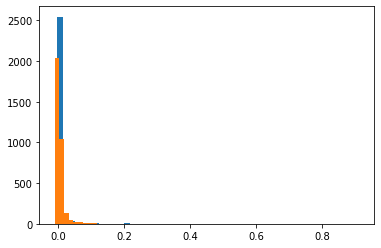

In [29]:
x0 = np.arange(len(nvss_act_fluxes))
x1 = np.arange(len(nvss_mdcw_fluxes))
x2 =  np.arange(len(back_sub_nvss_act_fluxes))
x3 =  np.arange(len(back_sub_nvss_mdcw_fluxes))



plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(nvss_act_fluxes, back_sub_nvss_act_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_back_sub.pdf')
plt.show()
print(np.mean(nvss_act_fluxes),np.mean(back_sub_nvss_act_fluxes))


plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(nvss_mdcw_fluxes, back_sub_nvss_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_mdcw_back_sub.pdf')
print(np.mean(nvss_mdcw_fluxes),np.mean(back_sub_nvss_mdcw_fluxes))
plt.show()
plt.close()

plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
#plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
#plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(back_sub_nvss_mdcw_fluxes, back_sub_nvss_act_fluxes)[1]

plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
#plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_mdcw_comp_back_sub.pdf')
plt.show()

plt.hist(back_sub_nvss_mdcw_fluxes, bins = 50)
plt.hist(back_sub_nvss_act_fluxes, bins = 50)
plt.show()

# VLASS KS Test

In [48]:
vlass_mdcw_fluxes_dict = pk.load(open('mooEmissionCatalog.pickle', 'rb'))


In [49]:
vlass_dict_mdcw = {}

vlass_mdcw_fluxes = []
back_sub_vlass_mdcw_fluxes = []
for i, key in enumerate(vlass_mdcw_fluxes_dict.keys()):
    if i == 0: continue
    if np.isnan(vlass_mdcw_fluxes_dict[key][0]) or np.isnan(vlass_mdcw_fluxes_dict[key][1]):continue
    flux = vlass_mdcw_fluxes_dict[key][0]
    backsub_flux = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]*16292 
    vlass_dict_mdcw[key] = [flux, backsub_flux]
    vlass_mdcw_fluxes.append(flux)
    back_sub_vlass_mdcw_fluxes.append(backsub_flux)

vlass_mdcw_fluxes = np.array(vlass_mdcw_fluxes)    
back_sub_vlass_mdcw_fluxes= np.array(back_sub_vlass_mdcw_fluxes)

cut = -99
vlass_mdcw_fluxes = vlass_mdcw_fluxes[vlass_mdcw_fluxes > cut]
vlass_mdcw_fluxes.sort()

back_sub_vlass_mdcw_fluxes = back_sub_vlass_mdcw_fluxes[back_sub_vlass_mdcw_fluxes > cut]
back_sub_vlass_mdcw_fluxes.sort()

In [50]:
print(np.mean(back_sub_vlass_mdcw_fluxes))
print(np.mean(vlass_mdcw_fluxes))


0.0003638475611825064
0.00058582716


0.0729656648918894
0.00058582716 0.0003638475611825064


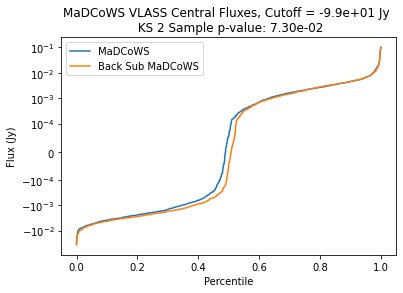

In [14]:
x1 = np.arange(len(vlass_mdcw_fluxes))
x3 =  np.arange(len(back_sub_vlass_mdcw_fluxes))

plt.plot(x1/len(x1), vlass_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_vlass_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(vlass_mdcw_fluxes, back_sub_vlass_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS VLASS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/VLASS_mdcw_back_sub.pdf')
print(np.mean(vlass_mdcw_fluxes),np.mean(back_sub_vlass_mdcw_fluxes))
plt.show()
plt.close()


# Compute spectral indecies

In [15]:
mooFile = open("madcowsCentralFlux.txt",'r')
mooLines = mooFile.readlines()
actFile = open("actCentralFlux.txt",'r')
actLines = actFile.readlines()
vlassmooNameArr = [] # moo names stored here
vlassmooFluxArr = [] # moo fluxes stored here
for line in mooLines:
    vlassmooNameArr.append(line.strip()[2:15])
    vlassmooFluxArr.append(float(line.strip()[18:len(line.strip())-2]))
vlassactNameArr = [] # act names stored here
vlassactFluxArr = [] # act fluxes stored here
for line in actLines:
    
    temp = float(line.strip()[23:len(line.strip())-2])
    if np.isnan(temp):continue
    vlassactFluxArr.append(temp)
    vlassactNameArr.append(line.strip()[2:21])

vlass_act_fluxes_dict = {}
#print(mooLines)
for i, key in enumerate(vlassactNameArr):
    vlass_act_fluxes_dict[key] = vlassactFluxArr[i]
vlass_mdcw_fluxes_dict = {}
for i, key in enumerate(vlassmooNameArr):
    vlass_mdcw_fluxes_dict[key] = vlassmooFluxArr[i]

In [16]:
nvss_act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
nvss_mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))
#nvss_act_fluxes_dict.pop('Name')
#nvss_mdcw_fluxes_dict.pop('Name')

In [17]:

print(len(vlass_mdcw_fluxes_dict))

2199


In [18]:
radio_dict = {}

for key in vlass_dict_mdcw.keys():
    const_v = np.log(2.4/1.4)
    
    if key in nvss_mdcw_fluxes_dict.keys():
        nvss_backsub_flux = nvss_mdcw_fluxes_dict[key][0] - nvss_mdcw_fluxes_dict[key][1]
        vlass_backsub_flux = vlass_dict_mdcw[key][1]
        if nvss_backsub_flux < 1e-3 or vlass_backsub_flux < 1e-3: continue
        print(vlass_backsub_flux, nvss_backsub_flux)
        spectral_index = (np.log(vlass_backsub_flux/nvss_backsub_flux)/(const_v))
        #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))
        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index
        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index
        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}

0.0014728697185830697 0.013129626207708632
0.001407036826321928 0.0021659008690676283
0.0035829506864288874 0.0012196055747505756
0.004438193249853839 0.0017965056072408688
0.0034293159834497544 0.0038083871567319285
0.0014025890204720781 0.002321069806091348
0.002511000581861822 0.0032394705033385383
0.006302670159755053 0.0010962454655262914
0.004216023372482169 0.0015653532122245192
0.009355819063046056 0.0012665273624824585
0.003150413262829943 0.008975635610450125
0.0017858407647963759 0.0011246578160716985
0.0011477030458308946 0.0011246365711836581
0.003492577702070676 0.0032218431462453447
0.0019830490026322423 0.0013921693075597684
0.0011345158929998433 0.02308003551706607
0.002463595476335456 0.044322592474308496
0.004788449477473478 0.0045010304072901144
0.0013800295877501867 0.0018156413905950537
0.005576509975071531 0.0017289242162123047
0.0021261302869390875 0.0024934363685033233
0.0021432859279713057 0.0019826405227964874
0.0013104660643961097 0.0016799677595591108
0.004

In [17]:
radio_dict

{'MOO J0001+1428': {'NVSS': -0.000787805036226087,
  'VLASS': 0.0010437152999145383,
  'nu': nan,
  '90': nan,
  '150': nan},
 'MOO J0001+3644': {'NVSS': 0.013129626207708632,
  'VLASS': 0.0014728697185830697,
  'nu': -4.0587620311279045,
  '90': 6.019299988554078e-10,
  '150': 7.570328173157867e-11},
 'MOO J0001+3440': {'NVSS': -0.00045076783713300764,
  'VLASS': 0.0006101164708525175,
  'nu': nan,
  '90': nan,
  '150': nan},
 'MOO J0001-2447': {'NVSS': 0.0005711775823439354,
  'VLASS': -7.529954362439639e-05,
  'nu': nan,
  '90': nan,
  '150': nan},
 'MOO J0001-2533': {'NVSS': 0.0021659008690676283,
  'VLASS': 0.001407036826321928,
  'nu': -0.8002842851258554,
  '90': 7.738075744151714e-05,
  '150': 5.141512648101628e-05},
 'MOO J0002-0820': {'NVSS': 0.0007147807650949541,
  'VLASS': 0.004306290072918273,
  'nu': 3.331851254329107,
  '90': 756.0340131945369,
  '150': 4146.754924548644},
 'MOO J0002+1751': {'NVSS': 0.0021168408236487447,
  'VLASS': -0.0011968466801164368,
  'nu': nan,

In [34]:
nus = []
nvss_fluxes = []
vlass_fluxes = []
for key in radio_dict.keys():
    if math.isnan(radio_dict[key]['nu']): continue
    nus.append(radio_dict[key]['nu'])
    nvss_fluxes.append(radio_dict[key]['NVSS'])
    vlass_fluxes.append(radio_dict[key]['VLASS'])
    
cut_nu = np.array(nus)[np.array(nus)<5]

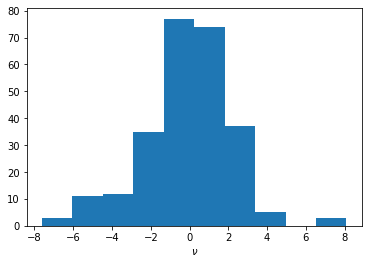

In [35]:
plt.hist(nus)
plt.xlabel(r'$\nu$')
plt.savefig('./plots/2.5radio_nus.pdf')

In [36]:
np.mean(cut_nu)

-0.16545428531034673

In [37]:
print(np.mean(nvss_fluxes))
print(np.mean(vlass_fluxes))

0.008472770665781441
0.004884453104111365


In [209]:
zipped_lists = zip(fluxes, nus)


sorted_zipped_lists = sorted(zipped_lists)
print(sorted_zipped_lists)

sorted_list1 = [element for _, element in sorted_zipped_lists]

[('-0.00010045965058290677', 9.342303801603004), ('-0.00010149660592343811', 5.227508672857886), ('-0.00011404907074314784', -0.9297979447671896), ('-0.0001151225882088625', 5.4446861381864595), ('-0.00011690936282653993', 7.060891630063547), ('-0.00012749096251602762', 2.1723800904260075), ('-0.00013255350976552722', 5.041101275997833), ('-0.0001365247765038332', 4.39619316266724), ('-0.00013857829095069053', 3.974785631478451), ('-0.0001431843065239943', 5.870708758859971), ('-0.00014783496228338683', 1.636197319182742), ('-0.00015043098723174314', 4.170991587694809), ('-0.00015465581130614985', 5.830837554548109), ('-0.00015484440721977492', 6.630081170189851), ('-0.00015768049979300702', 3.7339682436992008), ('-0.0001640878616092282', 1.2437125774361686), ('-0.00016858372779047983', 2.992933286857028), ('-0.00017459159381320733', 6.876136712508439), ('-0.00017544288716815528', 0.051837140503572667), ('-0.00018344077934550894', 3.8157737820526876), ('-0.00018538519631178024', 1.4259

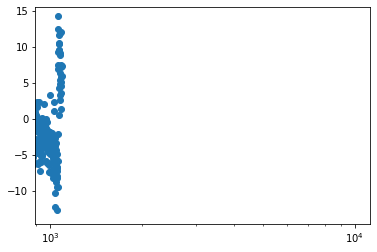

In [226]:
fluxes.sort()
rescale = [1e3*float(flux) for flux in fluxes]
plt.scatter(fluxes, sorted_list1)
plt.xscale('log')
#plt.xticks(np.arange(-1e-4,1e-2, step = 1e-3))

In [229]:
print(np.mean(nvss_mdcw_fluxes))

0.004126651915368459


In [244]:
for i, flux, in enumerate(vlassactFluxArr):
    if np.isnan(flux):
        vlassactFluxArr.pop(i)

In [19]:
print(v['MOO J0208-2951'])

KeyError: 'MOO J0208-2951'

In [38]:
#Clusters with y_0< -0.5
names = ['MOO J0043-2338', 'MOO J0208-2951', 'MOO J0306+0857', 'MOO J0354-2522',
 'MOO J0936+0336', 'MOO J2052-1408', 'MOO J2247+0507', 'MOO J2347-2734',
 'MOO J2038-3334']
for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])


MOO J0043-2338
h
[0.0059675188726551085, 0.00019149398712327173]
MOO J0208-2951
h
[0.03931925903658593, -0.00019755247822176992]
MOO J0306+0857
h
[0.03281623855447538, 0.0004513995702705938]
MOO J0354-2522
h
[0.2064431466705777, 0.0002227625510443941]
MOO J0936+0336
h
[0.036242353598764744, -0.00045654470223637286]
MOO J2052-1408
h
[0.0022240629888389167, 0.0005576805164401024]
MOO J2247+0507
h
[0.2201422664810533, 0.0002653516304617302]
MOO J2347-2734
h
[0.00040039119166035674, 0.00038353910240778864]
MOO J2038-3334
h
[0.007197404151314391, -0.00017308302389715423]


In [41]:
#High richness, low y0 clusters
names = ['MOO J0110-1521', 'MOO J0133-1057', 'MOO J0305+0453',
           'MOO J0448-1705', 'MOO J1322-0228', 'MOO J1346-0142',
           'MOO J1514+1346', 'MOO J0012+1602', 'MOO J1221+1603',
           'MOO J1426+1741']

for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])

MOO J0110-1521
h
[0.010233948248307131, -0.0004404534178601427]
MOO J0133-1057
h
[0.0058933376467126585, 0.0001266137209136411]
MOO J0305+0453
h
[0.03502558255267253, 0.0014892267338920033]
MOO J0448-1705
h
[0.0057291347559922596, 0.001253648671692225]
MOO J1322-0228
h
[0.0013319518467223008, 0.0003441544156424413]
MOO J1346-0142
h
[0.008598731682915361, 0.0008955004024549659]
MOO J1514+1346
h
[0.003021608801664628, 1.542291127703354e-05]
MOO J0012+1602
h
[0.012421487827244023, -0.0002646806151062457]
MOO J1221+1603
h
[0.002046866962660624, -0.00013855129909827408]
MOO J1426+1741
h
[0.0018466689782928264, -0.00022097920897193494]


In [91]:
x,y, z = 0.68, 3.4, 0

In [92]:
print('{:.2f}'.format(np.sqrt(x**2+y**2+z**2)))

3.47
